# Importing important libraries

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz , plot_tree
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Ensemble :
    methods is a machine learning technique that combines several base models in order to produce one optimal predictive model.(however it is important to note that Ensemble Methods do not only pertain to Decision Trees)

# Types of Ensemble Methods
1. BAGGing, or Bootstrap AGGregating. BAGGing gets its name because it combines Bootstrapping and Aggregation to form one ensemble model. Given a sample of data, multiple bootstrapped subsamples are pulled. A Decision Tree is formed on each of the bootstrapped subsamples. After each subsample Decision Tree has been formed, an algorithm is used to aggregate over the Decision Trees to form the most efficient predictor. The image below will help explain:

![](https://miro.medium.com/max/1400/0*PBGJw23ud8Sp7qO4.)

1. Boosting: 
    The term ‘Boosting’ refers to a family of algorithms which converts weak learner to strong learners.To find weak rule, we apply base learning (ML) algorithms with a different distribution. Each time base learning algorithm is applied, it generates a new weak prediction rule. This is an iterative process. After many iterations, the boosting algorithm combines these weak rules into a single strong prediction rule.

### For choosing the right distribution, here are the following steps:

Step 1:  The base learner takes all the distributions and assign equal weight or attention to each observation.

Step 2: If there is any prediction error caused by first base learning algorithm, then we pay higher attention to observations having prediction error. Then, we apply the next base learning algorithm.

Step 3: Iterate Step 2 till the limit of base learning algorithm is reached or higher accuracy is achieved.

Finally, it combines the outputs from weak learner and creates  a strong learner which eventually improves the prediction power of the model. Boosting pays higher focus on examples which are mis-classiﬁed or have higher errors by preceding weak rules.


### Types of Boosting Algorithms
Underlying engine used for boosting algorithms can be anything.  It can be decision stamp, margin-maximizing classification algorithm etc. There are many boosting algorithms which use other types of engine such as:

1. AdaBoost (Adaptive Boosting)
1. Gradient Tree Boosting
1. XGBoost

## AdaBoost (Adaptive Boosting) :
It fits a sequence of weak learners on different weighted training data. It starts by predicting original data set and gives equal weight to each observation. If prediction is incorrect using the first learner, then it gives higher weight to observation which have been predicted incorrectly. Being an iterative process, it continues to add learner(s) until a limit is reached in the number of models or accuracy.

Mostly, we use decision stamps with AdaBoost. But, we can use any machine learning algorithms as base learner if it accepts weight on training data set. We can use AdaBoost algorithms for both classification and regression problem.

You can refer article [Getting smart with machine learning - AdaBoost](https://www.analyticsvidhya.com/blog/2015/05/boosting-algorithms-simplified/) to understand AdaBoost algorithms in more detail.

You can tune the parameters to optimize the performance of algorithms, I’ve mentioned below the key parameters for tuning:

n_estimators: It controls the number of weak learners.
learning_rate:Controls the contribution of weak learners in the final combination. There is a trade-off between learning_rate and n_estimators.
base_estimators: It helps to specify different ML algorithm.
You can also tune the parameters of base learners to optimize its performance.

## Gradient Boosting
In gradient boosting, it trains many model sequentially. Each new model gradually minimizes the loss function (y = ax + b + e, e needs special attention as it is an error term) of the whole system using Gradient Descent method. The learning procedure consecutively fit new models to provide a more accurate estimate of the response variable.

The principle idea behind this algorithm is to construct new base learners which can be maximally correlated with negative gradient of the loss function, associated with the whole ensemble.  You can refer article [Learn Gradient Boosting Algorithm](https://www.analyticsvidhya.com/blog/2015/09/complete-guide-boosting-methods/) to understand this concept using an example.

In Python Sklearn library, we use Gradient Tree Boosting or GBRT. It is a generalization of boosting to arbitrary differentiable loss functions. It can be used for both regression and classification problems.

1. n_estimators: It controls the number of weak learners.
1. learning_rate:Controls the contribution of weak learners in the final combination. There is a trade-off between learning_rate and n_estimators.
1. max_depth: maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

You can tune loss function for better performance.

## Extreme Gradient Boosting Machine (XGBM)
Extreme Gradient Boosting or XGBoost is another popular boosting algorithm. In fact, XGBoost is simply an improvised version of the GBM algorithm! The working procedure of XGBoost is the same as GBM. The trees in XGBoost are built sequentially, trying to correct the errors of the previous trees.

Here is an article that intuitively explains the math behind XGBoost and also implements XGBoost in Python:

[An End-to-End Guide to Understand the Math behind XGBoost](https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/?utm_source=blog&utm_medium=4-boosting-algorithms-machine-learning)

But there are certain features that make XGBoost slightly better than GBM:

One of the most important points is that XGBM implements parallel preprocessing (at the node level) which makes it faster than GBM
XGBoost also includes a variety of regularization techniques that reduce overfitting and improve overall performance. You can select the regularization technique by setting the hyperparameters of the XGBoost algorithm
Learn about the different hyperparameters of XGBoost and how they play a role in the model training process here:

[Guide to Hyperparameter Tuning for XGBoost in Python](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)
Additionally, if you are using the XGBM algorithm, you don’t have to worry about imputing missing values in your dataset. The XGBM model can handle the missing values on its own. During the training process, the model learns whether missing values should be in the right or left node.

1. LightGBM
The LightGBM boosting algorithm is becoming more popular by the day due to its speed and efficiency. LightGBM is able to handle huge amounts of data with ease. But keep in mind that this algorithm does not perform well with a small number of data points.

Let’s take a moment to understand why that’s the case.

The trees in LightGBM have a leaf-wise growth, rather than a level-wise growth. After the first split, the next split is done only on the leaf node that has a higher delta loss.

Consider the example I’ve illustrated in the below image:

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/11194227/depth.png)

After the first split, the left node had a higher loss and is selected for the next split. Now, we have three leaf nodes, and the middle leaf node had the highest loss. The leaf-wise split of the LightGBM algorithm enables it to work with large datasets.

In order to speed up the training process, LightGBM uses a histogram-based method for selecting the best split. For any continuous variable, instead of using the individual values, these are divided into bins or buckets. This makes the training process faster and lowers memory usage.

Here’s an excellent article that compares the LightGBM and XGBoost Algorithms:

[LightGBM vs XGBOOST: Which algorithm takes the crown?](https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/?utm_source=blog&utm_medium=4-boosting-algorithms-machine-learning)

## CatBoost
As the name suggests, CatBoost is a boosting algorithm that can handle categorical variables in the data. Most machine learning algorithms cannot work with strings or categories in the data. Thus, converting categorical variables into numerical values is an essential preprocessing step.

CatBoost can internally handle categorical variables in the data. These variables are transformed to numerical ones using various statistics on combinations of features.

Another reason why CatBoost is being widely used is that it works well with the default set of hyperparameters. Hence, as a user, we do not have to spend a lot of time tuning the hyperparameters.

Here is an article that implements CatBoost on a machine learning challenge:

[CatBoost: A Machine Learning Library to Handle Categorical Data Automatically](https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/?utm_source=blog&utm_medium=4-boosting-algorithms-machine-learning)



# Random Forest Regression

In [3]:
df = pd.read_csv(r'/home/rahul/my_project_dir/python_learning/Class/Datasets/Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [19]:
X = df.iloc[: ,1:2].values
y = df.iloc[: , 2].values

array([1])

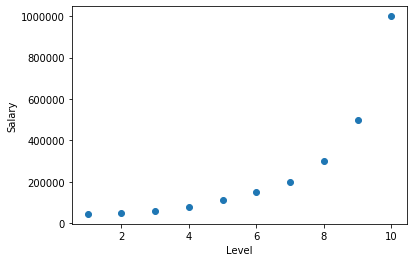

In [12]:
plt.scatter(X, y)
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [13]:
reg = RandomForestRegressor(n_estimators=2 , random_state=0)
reg.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [14]:
reg.predict([[19]])

array([1000000.])

In [15]:
reg.score(X,y)

0.9841546076386414

In [16]:
reg.predict([[9.9] , [10] , [11]])

array([1000000., 1000000., 1000000.])

In [21]:
x_grid = np.arange(min(X) , max(X) , 0.001)
x_grid = x_grid.reshape(len(x_grid) ,1)
x_grid

array([[1.   ],
       [1.001],
       [1.002],
       ...,
       [9.997],
       [9.998],
       [9.999]])

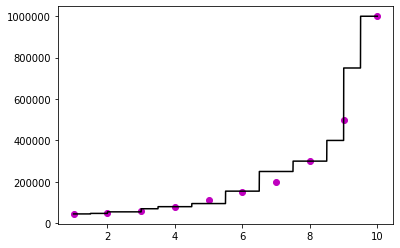

In [23]:
plt.scatter(X,y ,color= 'm')
plt.plot(x_grid , reg.predict(x_grid) ,'k')

In [24]:
reg.estimators_

[DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=209652396, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=398764591, splitter='best')]

[Text(744.0, 978.48, 'X[0] <= 9.0\nmse = 133036000000.0\nsamples = 6\nvalue = 287000.0'),
 Text(620.0, 761.0400000000001, 'X[0] <= 5.5\nmse = 7429687500.0\nsamples = 5\nvalue = 108750.0'),
 Text(372.0, 543.6, 'X[0] <= 3.5\nmse = 205555555.556\nsamples = 3\nvalue = 61666.667'),
 Text(248.0, 326.1600000000001, 'X[0] <= 2.0\nmse = 56250000.0\nsamples = 2\nvalue = 52500.0'),
 Text(124.0, 108.72000000000003, 'mse = 0.0\nsamples = 1\nvalue = 45000.0'),
 Text(372.0, 108.72000000000003, 'mse = 0.0\nsamples = 1\nvalue = 60000.0'),
 Text(496.0, 326.1600000000001, 'mse = 0.0\nsamples = 1\nvalue = 80000.0'),
 Text(868.0, 543.6, 'X[0] <= 7.5\nmse = 2500000000.0\nsamples = 2\nvalue = 250000.0'),
 Text(744.0, 326.1600000000001, 'mse = 0.0\nsamples = 1\nvalue = 200000.0'),
 Text(992.0, 326.1600000000001, 'mse = 0.0\nsamples = 1\nvalue = 300000.0'),
 Text(868.0, 761.0400000000001, 'mse = 0.0\nsamples = 1\nvalue = 1000000.0')]

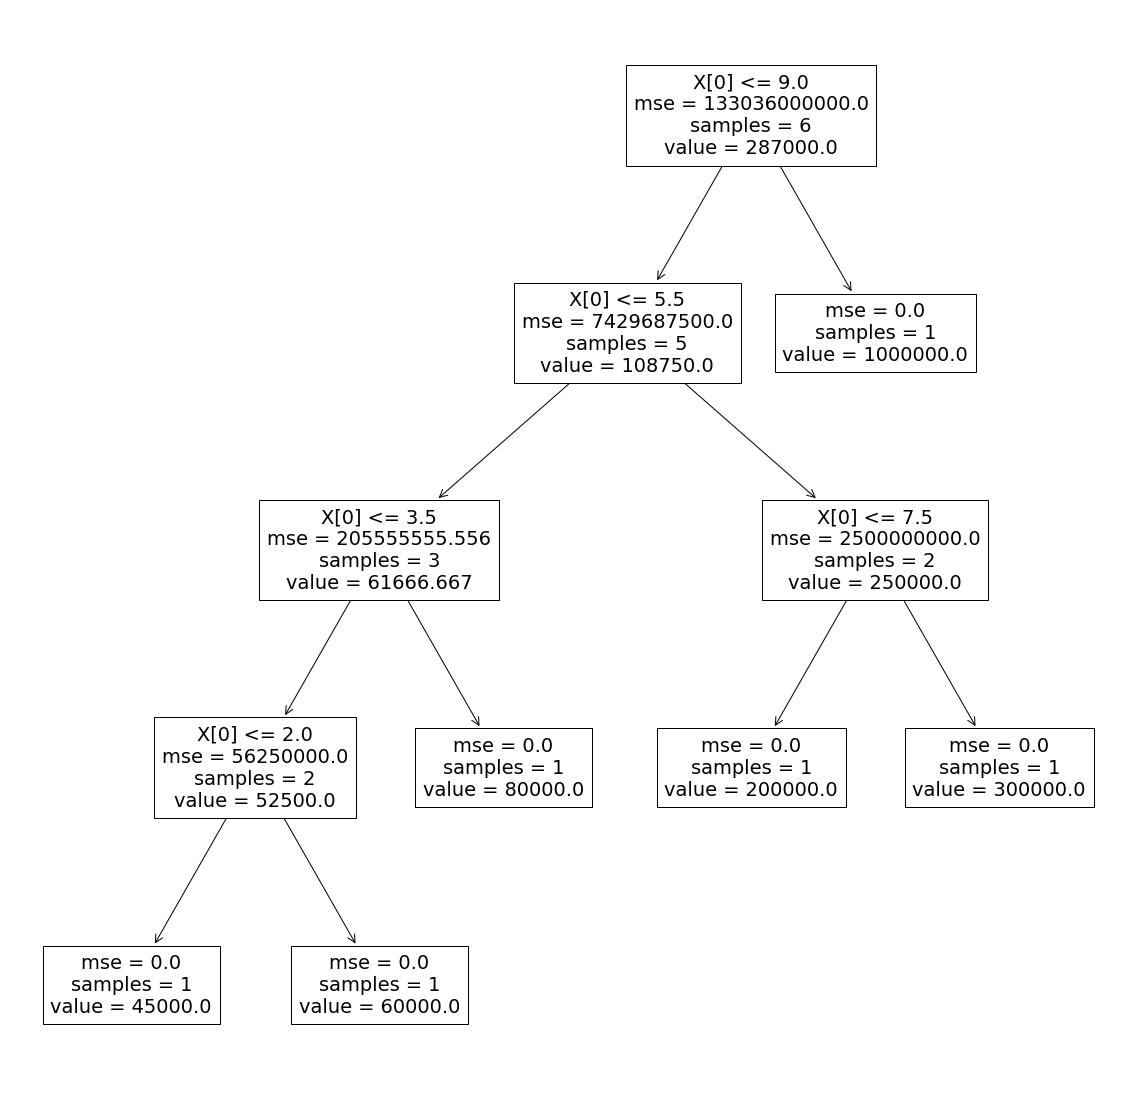

In [26]:
plt.figure(figsize=(20,20))
plot_tree(reg.estimators_[0])

In [28]:
export_graphviz(reg.estimators_[0] , out_file='RFR.dot')

!['Random Forest regression'](rfr.png)

# Random Forest Classifier

In [32]:
# loading data 
digits = load_digits()

In [31]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [34]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [35]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [36]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [37]:
print(digits.target)

[0 1 2 ... 8 9 8]


In [38]:
print(len(digits.images))

1797


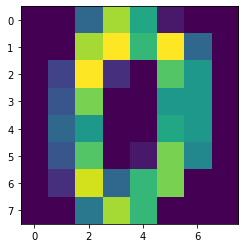

In [39]:
plt.imshow(digits.images[0])

In [40]:
X = digits.data # independent variable
y = digits.target # dependent variable

In [45]:
# splitting the data
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state = 0)

In [46]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1437, 64)
(360, 64)
(1437,)
(360,)


In [49]:
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
predictions = clf.predict(X_test)

In [52]:
# training score
clf.score(X_train , y_train)

1.0

In [53]:
# test score
clf.score(X_test , y_test)

0.9777777777777777

In [56]:
# creating confusin matrix
cm = confusion_matrix(y_test , predictions)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  1, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]])

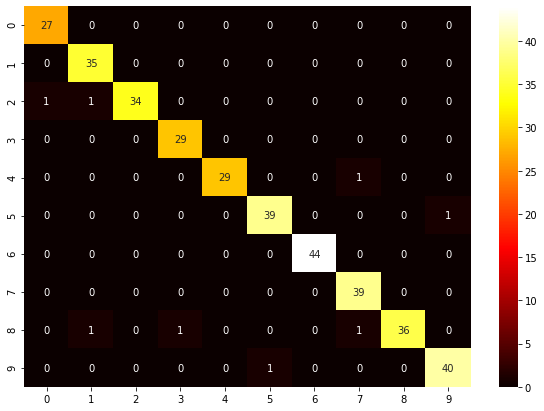

In [59]:
plt.figure(figsize =(10,7))
sns.heatmap(cm , cmap='hot' , annot=True)

In [62]:
clf.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1917213111, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=979803403, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, m

[Text(579.4597184531885, 1057.0, 'X[38] <= 0.5\ngini = 0.9\nsamples = 903\nvalue = [152, 144, 136, 153, 141, 152, 152, 140, 132, 135]'),
 Text(287.2810379918589, 996.6, 'X[21] <= 0.5\ngini = 0.851\nsamples = 414\nvalue = [5, 133, 132, 66, 18, 98, 42, 26, 119, 31]'),
 Text(126.43962008141112, 936.2, 'X[25] <= 3.5\ngini = 0.715\nsamples = 130\nvalue = [0, 34, 35, 2, 5, 90, 40, 0, 0, 0]'),
 Text(74.19810040705563, 875.8, 'X[5] <= 9.5\ngini = 0.756\nsamples = 76\nvalue = [0, 33, 33, 2, 1, 22, 28, 0, 0, 0]'),
 Text(68.14111261872456, 815.4000000000001, 'X[19] <= 11.5\ngini = 0.712\nsamples = 67\nvalue = [0, 33, 33, 2, 1, 5, 28, 0, 0, 0]'),
 Text(30.28493894165536, 755.0, 'X[46] <= 5.5\ngini = 0.465\nsamples = 29\nvalue = [0, 1, 29, 2, 0, 2, 7, 0, 0, 0]'),
 Text(18.170963364993217, 694.6, 'X[13] <= 7.0\ngini = 0.174\nsamples = 23\nvalue = [0, 1, 29, 0, 0, 2, 0, 0, 0, 0]'),
 Text(12.113975576662144, 634.2, 'X[27] <= 14.0\ngini = 0.064\nsamples = 21\nvalue = [0, 1, 29, 0, 0, 0, 0, 0, 0, 0]'),


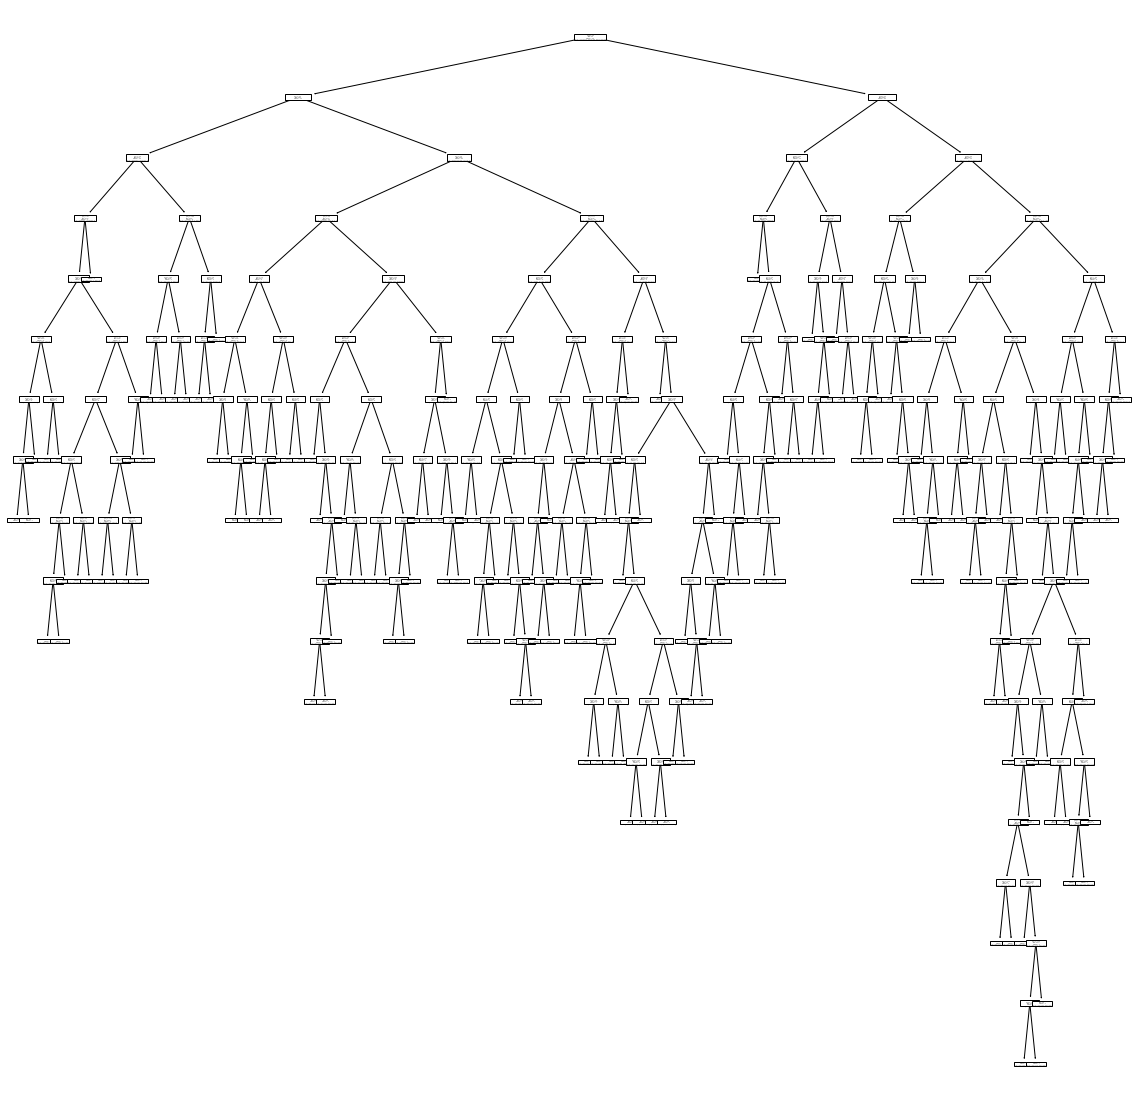

In [66]:
plt.figure(figsize=(20,20))
plot_tree(clf.estimators_[0])

In [68]:
export_graphviz(clf.estimators_[0] , out_file='RFC.dot')

![Decision Tree Classifier](rfc.png)